# Projet Numérique 3


## Questions théoriques

1) Le théorème du cours qui nous autorsie à estimer l'espérance conditionnelle par la moyenne empririque des simulations conditionnelles et la loi des grands nombres que l'on peut appliquer ici car les simulations de la profondeur de câble réalisées sont indépedantes, de même loi et intégrables. Ainsi, on estime $L$ par $L^{*}=\frac{1}{K} \sum_{k=1}^{K} l_{(k)}$

2) Pour trouver la loi conditionnelle du vecteur des composantes de Z correspondant aux points de discrétisation sans observation, connaissant les valeurs prises par les composantes aux sites d'observation, on utilise les résultats du cours Probabilite IV sur les lois conditionnelles pour les vecteurs Gaussiens à densité.

Notons $Z_{i}$ le vecteur des composantes inconnues

Notons $Z_{c}$ le vecteur des composantes connues (car observées) 

On cherche donc $f_{Z_{i}, Z_{c}=z_{c}}$


$
\begin{aligned}
\text {Notons } C_{Z_{i}} &=\operatorname{Cov}\left(Z_{i}, Z_{i}\right) \\
C_{Z_{c}} &=\operatorname{Cov}\left(Z_{c}, Z_{c}\right) \\
C_{Z_{i}, Z_{c}} &=\operatorname{Cov}\left(Z_{i}, Z_{c}\right)\\
\end{aligned}
$


$\mathrm{CS}_{Z_{i}}$ le complément de Schur de la matrice $C_{Z_{i}}$ 

Alors on sait que:

$$
\begin{aligned}
&f_{Z_{i} | Z_{c} = z_{c}}\left(z_{i}\right)=\frac{1}{(2 \pi)^{k / 2} \sqrt{\operatorname{det}\left(CS_{Z_{i}}\right)}} \exp \left(-\frac{1}{2}\left(z_{i}-\psi\left(z_{c}\right)\right)^{t} \operatorname{CS}_{Z_{i}}^{-1}\left(z_{i}-\psi\left(z_{c}\right)\right)\right)\\
\end{aligned}
$$

$
\begin{aligned}
&avec :\\
&CS_{Z_{i}}=C_{Z_{i}}-C_{Z_{i}, Z_{c}} C_{Z_{c}}^{-1} C_{Z_{c}, Z_{i}}\\
&\psi\left(z_{c}\right)=m_{Z_{i} | Z_{c}=z_{c}}=m_{Z_{i}} - C_{Z_{i}, Z_{c}} C_{Z_{c}}^{-1}\left(Z_{c}-m_{Z_{c}}\right)
\end{aligned}
$


Autrement dit la variable aléatoire $\mathbf{Z_{i}}|\mathbf{Z_{c}}=z_{c}$ suit une loi gaussienne d'espérance $m_{Z_{i}} - C_{Z_{i}, Z_{c}} C_{Z_{c}}^{-1}\left(Z_{c}-m_{Z_{c}}\right)$ et de matrice de covariance $C_{Z_{i}}-C_{Z_{i}, Z_{c}} C_{Z_{c}}^{-1} C_{Z_{c}, Z_{i}}$

3)
Soit Y = ($Y_{1}$ ... $Y_{p}$) un vecteur de composantes gausiennes indépendantes, toutes d'espérance nulle et de variance 1.

Soit R une matrice p x p, soit m un vecteur de taille p.

Notons $\phi_{X}$, la fonction caractéristique de X, vecteur valeurs dans $\mathbb{R}^{p}$.

Posons $Z=m+RY$

Alors, par propriété de transformation linéaire : 
$$
\phi_{Z}=\phi_{m+RY}
$$
$$
\phi_{m+RY}(u)=\exp (i <u, m>) \phi_{Y}\left(R^{t} u\right) \quad \forall u \in \mathbb{R}^{p}
$$

Or on sait que la fonction caractéristique $\phi_{Z}$ caractérise la loi du vecteur aléatoire Z. $Z$ est alors gaussien d'espérance $m$ et de matrice de covariance $RR^t$.

4) On  commence par calculer les matrices de covariances de $\mathbf{Z_{i}}$, de $\mathbf{Z_{c}}$ et $Cov(\mathbf{Z_{i}},\mathbf{Z_{c}})$. On peut ainsi calculer $CS_{Z_{i}}$


On simule ensuite les N+1-n variables aléatoires gaussiennes centrées réduites à l'aide de la méthode de Box-Muller. Notons par exemple Y le vecteur aléatoire (gaussien) ayant pour composante chacune de ces variables aléatoires.

On détermine la décomposition (de Cholesky par exemple) de $CS_{Z_{i}}=RR^{t}$ ,puis à l'aide de R et Y, la question 3 nous permet alors de construire $\mathbf{Z_{i}}|\mathbf{Z_{c}}=z$

## Questions informatiques

In [1]:
#Chargement des dépendances
import numpy as np
import math
import matplotlib.pyplot as plt

#Discrétisation
A=0
B=500
N=101
Delta = (B-A)/(N-1)
discretization_indexes = np.arange(N)
dicretization = discretization_indexes*Delta

#Paramètre du modèle
mu = -5
a = 50
sigma2 = 12

#Données
observation_indexes = [0, 20, 40, 60, 80, 100]
depth = np.array([0, -4, -12.8, -1, -6.5, 0])

#Indices des composantes correspondant aux observations et aux composantes non observées
unknown_indexes=list(set(discretization_indexes)-set(observation_indexes))

### Question 1

In [4]:
#Pour un couple de points
def cova(l, a, sigma2):
    '''
    Fonction qui retourne la covariance entre deux points
    '''
    return sigma2*np.exp(-l/a)

#Pour une matrice de covariance
def cova_mat(L, a, sigma2):
    '''
    Fonction qui retourne la matrice de covariance C à partir de la matrice des longueurs L
    '''
    n, m = np.shape(L)
    C = np.zeros((n,m))
    for i in range (n):
        for j in range (m):
            C[i][j] = cova(L[i][j], a, sigma2)
    return C
    

### Question 2

In [35]:
def mat_distance(N, Delta):
    '''
    Fonction qui renvoie la matrice des disatnces
    '''
    L = np.zeros((N, N))
    for i in range (N):
        for j in range (N):
            L[i][j] = abs(i-j)*Delta
    return L

A=mat_distance(N, Delta)

In [36]:
A

array([[  0.,   5.,  10., ..., 490., 495., 500.],
       [  5.,   0.,   5., ..., 485., 490., 495.],
       [ 10.,   5.,   0., ..., 480., 485., 490.],
       ...,
       [490., 485., 480., ...,   0.,   5.,  10.],
       [495., 490., 485., ...,   5.,   0.,   5.],
       [500., 495., 490., ...,  10.,   5.,   0.]])

### Question 3

In [38]:
def cova_vecteur(N, Delta, a, sigma2): #pour les questions d'après
    '''
    covaraince d'un vecteur
    '''
    L = mat_distance(N, Delta)
    return cova_mat(L, a, sigma2)

B = cova_mat(A,a,sigma2)
print(B)


[[1.20000000e+01 1.08580490e+01 9.82476904e+00 ... 6.65419193e-04
  6.02096185e-04 5.44799157e-04]
 [1.08580490e+01 1.20000000e+01 1.08580490e+01 ... 7.35401941e-04
  6.65419193e-04 6.02096185e-04]
 [9.82476904e+00 1.08580490e+01 1.20000000e+01 ... 8.12744838e-04
  7.35401941e-04 6.65419193e-04]
 ...
 [6.65419193e-04 7.35401941e-04 8.12744838e-04 ... 1.20000000e+01
  1.08580490e+01 9.82476904e+00]
 [6.02096185e-04 6.65419193e-04 7.35401941e-04 ... 1.08580490e+01
  1.20000000e+01 1.08580490e+01]
 [5.44799157e-04 6.02096185e-04 6.65419193e-04 ... 9.82476904e+00
  1.08580490e+01 1.20000000e+01]]


### Question 4

In [40]:
#On définit 3 fonctions pour répondre à cette question


def cova_known(observation_indexes, N, Delta, a, sigma2):
    '''
    Retourne la matrice de covariance entre les observations
    '''
    C = cova_vecteur(N, Delta, a, sigma2)
    k = len(observation_indexes)
    Cov_k = np.zeros((k, k))
    for i in range(k):
        for j in range(k):
            Cov_k[i][j] = C[observation_indexes[i]][observation_indexes[j]]
    return Cov_k

def cova_unknown_and_known(observation_indexes, unknown_indexes, N, Delta, a, sigma2):
    '''
    Retourne la matrice de covariance entre les observations et les inconnues
    '''
    C = cova_vecteur(N, Delta, a, sigma2)
    u = len(unknown_indexes)
    k = len(observation_indexes)
    Cov_u_k = np.zeros((u, k))
    for i in range(u):
        for j in range(k):
            Cov_u_k[i][j] = C[unknown_indexes[i]][observation_indexes[j]]
    return Cov_u_k





def cova_unknown(unknown_indexes, N, Delta, a, sigma2):
    '''
    Retourne la matrice de covariance entre les inconnues
    '''
    C = cova_vecteur(N, Delta, a, sigma2)
    u = len(unknown_indexes)
    Cov_u = np.zeros((u, u))
    for i in range(u):
        for j in range(u):
            Cov_u[j][i] = C[unknown_indexes[j]][unknown_indexes[i]]
    return Cov_u

C_c=cova_known(observation_indexes, N, Delta, a, sigma2)
C_ci=cova_unknown_and_known(observation_indexes, unknown_indexes, N, Delta, a, sigma2)
C_i=cova_unknown(unknown_indexes, N, Delta, a, sigma2)


### Question 5

D'après les résultats du cours Probabilite IV sur les lois conditionnelles pour les vecteurs Gaussiens à densité cités précédemment : 

$E\left(Z_{i} | Z_{c}\right)=\phi\left(Z_{c}\right)=m_{Z_{i}}-C_{Z_{i}, Z_{c}} C_{Z_{c}}^{-1}\left(Z_{c}-m_{Z_{c}}\right)$


In [17]:
def espérance_u_sachant_k(observation_indexes, unknown_indexes, N, Delta, a, sigma2, mu):
    Cov_u_k = cova_unknown_and_known(observation_indexes, unknown_indexes, N, Delta, a, sigma2)
    C_k_inv = np.linalg.inv(cova_known(observation_indexes, N, Delta, a, sigma2))
    u = len(unknown_indexes)
    k = len(observation_indexes)
    m_u = np.array([mu]*u)
    m_k = np.array([mu]*k)
    return np.array(m_u + np.dot(Cov_u_k, np.dot(C_k_inv, (depth-m_k))))

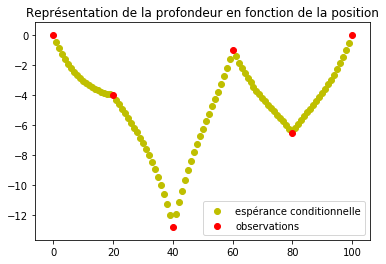

In [34]:
E = espérance_u_sachant_k(observation_indexes, unknown_indexes, N, Delta, a, sigma2, mu)

plt.scatter(unknown_indexes,E,label="espérance conditionnelle",color='y')
plt.scatter(observation_indexes,depth,label="observations",color='r')
plt.title('Représentation de la profondeur en fonction de la position')
plt.legend()
plt.show()

### Question 6

On a vu dans le cours de Probabilités IV que la variable aléatoire $Z_{i}|Z_{c} = z_{c}$ a pour matrice de covariance $CS_{Z_{i}}=C_{Z_{i}}-C_{Z_{i}, Z_{c}} C_{Z_{c}}^{-1} C_{Z_{c}, Z_{i}}$.




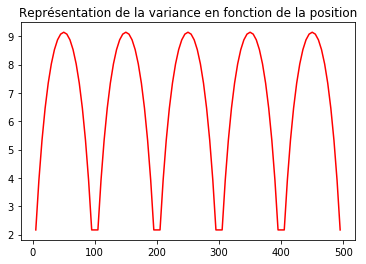

In [33]:
def variance_conditionnelle(observation_indexes, unknown_indexes, N, Delta, a, sigma2):
    C_k = cova_known(observation_indexes, N, Delta, a, sigma2)
    C_u = cova_unknown(unknown_indexes, N, Delta, a, sigma2)
    C_uk = cova_unknown_and_known(observation_indexes, unknown_indexes, N, Delta, a, sigma2)
    V = C_u - np.dot(np.dot(C_uk, np.linalg.inv(C_k)),np.transpose(C_uk))
    return(V)

    
V = variance_conditionnelle(observation_indexes, unknown_indexes, N, Delta, a, sigma2)

X = [i*Delta for i in unknown_indexes]
Y = [V[i][i] for i in range(len(V[0]))]
plt.plot(X,Y,'r')
plt.title('Représentation de la variance en fonction de la position')
plt.show()

### Question 7

D'après le cours de Probabilités IV et la question 2 de la partie théorique, la variable aléatoire $Z_{i}|Z_{c} = z_{c}$ suit une loi gaussienne d'espérance $\psi\left(z_{c}\right)$ et de matrice de covariance $CS_{Z_{i}}=C_{Z_{i}}-C_{Z_{i}, Z_{c}} C_{Z_{c}}^{-1} C_{Z_{c}, Z_{i}}$.

Notons $Z_{i}^{j}$ la $j^{ème}$ composante du vecteur $Z$. Elle suit une loi gaussienne d'espérance $m_{j} = \psi\left(z_{c}\right)^{j}$ et de variance $\sigma_{j}^{2} = CS_{Z_{i}}(j,j)$.

On peut donc utiliser la méthode de **Box-Muller** pour simuler chacune des composantes du vecteur $Z_{i}$.

Notons $U$ et $V$ deux variables aléatoires indépendantes de loi uniforme sur $]0,1[$.
Alors la variable aléatoire $X = \sqrt { -2\ln(U)}\cos(2\pi V)$ suit une loi normale centrée réduite.

Par combinaison linéaire de variables aléatoires gaussiennes indépendantes, $\sigma_{j}X + m_{j}$ suit une loi normale d'espérance $m_{j}$ et de variance $\sigma_{j}^{2}$ qui permet de simuler $Z_{i}^{j}$ .

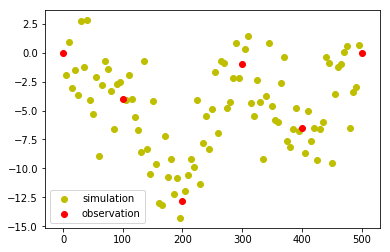

In [31]:
def simulation_conditionnelle(observation_indexes, unknown_indexes, N, Delta, a, sigma2, mu):
    
    E = espérance_u_sachant_k(observation_indexes, unknown_indexes, N, Delta, a, sigma2, mu)
    V = variance_conditionnelle(observation_indexes, unknown_indexes, N, Delta, a, sigma2)
    
    simulation = []
    
    for i in range(len(unknown_indexes)):
        A = np.random.random()
        B = np.random.random()
        X = np.sqrt(-2*np.log(A))*np.cos(2*np.pi*B)
        
        m = E[i]
        sigma = np.sqrt(V[i][i])
        
        simulation.append(sigma*X+m)
    return (simulation)
        
simulation = simulation_conditionnelle(observation_indexes, unknown_indexes, N, Delta, a, sigma2, mu)      

plt.scatter(X,simulation,label="simulation",color='y')
plt.scatter(np.array(observation_indexes)*5,depth,label="observation",color='r')
plt.legend()
plt.show()

### Question 8

In [41]:
def longueur_cable(Z, Delta):
    '''
    Fonction qui renvoie la longueur du cable
    '''
    l = 0
    for i in range(len(Z)-1):
        l += np.sqrt(Delta**2 + (Z[i+1]-Z[i])**2)
    return l

### Question 9

In [42]:
def longueur_moy(observation_indexes, unknown_indexes, N, Delta, a, sigma2, mu, nbr):
    l_moy = 0
    for i in range(nbr):
        Z = simulation_contionelle(observation_indexes, unknown_indexes, N, Delta, a, sigma2, mu)
        l_moy += longueur_cable(Z, Delta)
    return l_moy/nbr

def moy_longueur(observation_indexes, unknown_indexes, N, Delta, a, sigma2, mu):
    E = espérance_u_sachant_k(observation_indexes, unknown_indexes, N, Delta, a, sigma2, mu)
    l = 0
    for i in range(N):
        l += np.sqrt(Delta**2 + (E[i+1]-E[i])**2)
    return l


### Question 10

Notons $L_i$ la longueur à la ième simulation, 
$M_n = \frac{\sum_{i=1}^n L_i}{n}$ donc $M_{n+1} = \frac{\sum_{i=1}^{n+1} L_i}{n+1} = \frac{nM_n + L_{i+1}}{n+1}$ 

avec $M_1 = L_1$


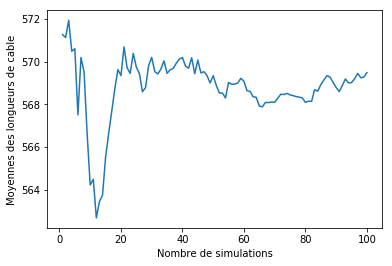

In [43]:
n_simu = 100

def liste_L_simu(n_simu, observation_indexes, unknown_indexes, N, Delta, a, sigma2, mu):
    L=[]
    for k in range(n_simu):
        Z = simulation_conditionnelle(observation_indexes, unknown_indexes, N, Delta, a, sigma2, mu)
        L += [longueur_cable(Z, Delta)]
    return L

L = liste_L_simu(n_simu, observation_indexes, unknown_indexes, N, Delta, a, sigma2, mu)

def moyenne_simu(n_simu, observation_indexes, unknown_indexes, N, Delta, a, sigma2, mu):
    L = liste_L_simu(n_simu, observation_indexes, unknown_indexes, N, Delta, a, sigma2, mu)
    M = [L[0]]
    for j in range(1,n_simu):
        M += [((j-1)*M[j-1]+L[j])/j]
    return M


        
n = [(i+1) for i in range(n_simu)]
M = moyenne_simu(n_simu, observation_indexes, unknown_indexes, N, Delta, a, sigma2, mu)
plt.plot(n,M)
plt.xlabel("Nombre de simulations")
plt.ylabel("Moyennes des longueurs de cable")
plt.show()

### Question 11

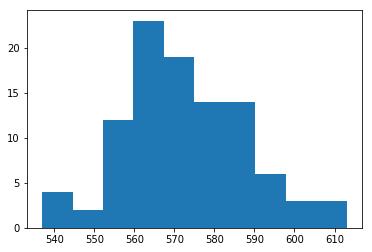

In [46]:
L = liste_L_simu(n_simu, observation_indexes, unknown_indexes, N, Delta, a, sigma2, mu)

In [ ]:
hist = plt.hist(L,bins = int(n_simu/10))

### Question 12

In [50]:
#Prem_ère méthode: uen méthode empirique testant dans un intervalle puis l'aggradissant tout en le gardant centré sur la moyenne

def moyenne(datas):
    moyenne = 0
    for i in datas:
        moyenne += i
    return moyenne/len(datas)

def interc1(datas,precision):
    m = moyenne(datas)
    p = 0
    temp = 0
    while p < 0.95:
        p = 0
        temp += 1
        for i in datas:
            if m-temp*precision/2 <= i <= m+temp*precision/2:
                p += 1
        p /= len(datas)
    return [m-temp*precision/2,m+temp*precision/2]

#Deuxième méthode: on utilise l'écart-type, en disant que 95% des valeurs sont comprises entre la moyenne plus ou moins 2 fois l'écart-type.


def variance(datas):
    m=moyenne(datas)
    return moyenne([(x-m)**2 for x in datas])

def ecarttype(datas):
    return np.sqrt(variance(datas))

def interc2(datas):
    return [moyenne(datas)-2*ecarttype(datas),moyenne(datas)+2*ecarttype(datas)]


In [48]:
interc1(L,0.001)

[543.2466849844933, 602.2486849844933]

In [51]:
interc2(L)

[542.2810770784173, 603.2142928905693]

In [ ]:
Les deux methodes donnent des intervalles similaire

### Question 13

In [54]:
def estimation(longueurs):
    compt = [1 if el >= 525 else 0 for el in longueurs]
    return(sum(compt)/len(compt))

estimation(L)

1.0

### Question 14

In [ ]:
M1000 = moyenne_simu(1000, observation_indexes, unknown_indexes, N, Delta, a, sigma2, mu)
M10000 = moyenne_simu(10000, observation_indexes, unknown_indexes, N, Delta, a, sigma2, mu)
M100000 = moyenne_simu(100000, observation_indexes, unknown_indexes, N, Delta, a, sigma2, mu)

Pour 1000

In [ ]:
hist = plt.hist(M1000, range = (int(min(L)) - 1, int(max(L)) + 1), bins = int(1000/10))

In [ ]:
interc1(M1000,0.001)

In [ ]:
interc2(M1000)

In [56]:
estimation(M1000)

NameError: name 'M1000' is not defined

Pour 10000

In [ ]:
hist = plt.hist(M10000, range = (int(min(L)) - 1, int(max(L)) + 1), bins = int(10000/10))

In [ ]:
interc1(M10000)

In [ ]:
interc2(M10000)

In [ ]:
estimation(M10000)

Pour 100000

In [ ]:
hist = plt.hist(M100000, range = (int(min(L)) - 1, int(max(L)) + 1), bins = int(100000/10))

In [ ]:
interc1(M100000)

In [ ]:
interc2(M100000)

In [ ]:
estimation(M100000)

On peut voir que pour 100 simulations, l'histogramme n'est pas très précis et la probabilité ainsi que les intervalles diffèrent un peu des calculs avec des simulations plus nombreuses. Mais à partir de 1000 simulations, on se retrouve dans des intervalles qui sont toujours similaires avec des probabilités qui sont proches les unes des autres. De plus pour 1000 simulations les calculs sont très rapides, il n'y a pas de temps d'attente.